## Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("E:/VS_Code/Projects/Customer_Churn/notebooks/data/processed_customer_churn_data.csv")

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
2542,3639-XJHKQ,Female,52,No,3,San Jose,95135,37.286820,-121.723877,0,19,Offer D,Yes,36,No,Yes,DSL,20.0,Yes,Yes,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,60.60,1297.80,0.00,0,693.12,1990.92,Stayed,1,0.085475,0,1-2 Years,4,False,3,False
6228,8807-OPMBM,Female,36,Yes,3,Newbury Park,91320,34.172071,-118.946262,1,55,Offer B,Yes,1,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,Yes,Credit Card,25.65,1388.00,0.00,0,79.20,1467.20,Stayed,1,0.116996,0,4+ Years,1,False,0,False
5772,8118-TJAFG,Male,33,Yes,1,Gardena,90247,33.890853,-118.297967,1,9,No Offer,Yes,36,No,Yes,Fiber Optic,16.0,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,101.50,906.85,0.00,0,332.46,1239.31,Stayed,0,0.550476,0,0-1 Year,6,False,2,False
1003,1452-UZOSF,Male,31,Yes,1,Guerneville,95446,38.525760,-123.013347,9,72,Offer A,Yes,7,Yes,Yes,Fiber Optic,24.0,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Two Year,Yes,Credit Card,106.10,7548.60,23.39,0,515.52,8040.73,Stayed,1,0.073832,0,4+ Years,7,True,4,False
5717,8050-XGRVL,Female,22,Yes,3,Millville,96062,40.531257,-122.148139,5,62,Offer B,Yes,32,No,Yes,DSL,71.0,Yes,No,Yes,No,No,No,No,Yes,One Year,No,Credit Card,54.75,3425.35,8.50,0,2041.04,5457.89,Stayed,1,0.116996,0,4+ Years,3,True,2,False
2992,4285-GYRQC,Female,63,Yes,0,Newport Beach,92662,33.606336,-117.893042,1,7,Offer E,Yes,44,No,Yes,Fiber Optic,26.0,No,No,Yes,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,86.25,587.10,0.00,0,312.62,899.72,Churned,1,0.114298,0,0-1 Year,3,False,1,True


In [6]:
df['customer_status'] = df['churned'].apply(lambda x : 1 if x == True else 0)

df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
1823,2660-EMUBI,Male,71,No,0,Escondido,92027,33.141265,-116.967221,0,10,Offer D,Yes,41,Yes,Yes,Fiber Optic,14.0,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,95.35,898.35,0.00,0,413.70,1312.05,1,1,0.085475,0,0-1 Year,4,False,0,True
5805,8173-RXAYP,Female,51,Yes,1,Mcarthur,96056,41.108310,-121.360362,8,24,No Offer,Yes,30,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,19.70,452.55,0.00,0,729.84,1182.39,0,0,0.550476,0,1-2 Years,0,False,0,False
5192,7305-ZWMAJ,Male,45,Yes,0,Oakdale,95361,37.785033,-120.776141,2,30,No Offer,Yes,22,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,One Year,No,Credit Card,20.70,587.10,0.00,0,686.70,1273.80,0,0,0.550476,0,2-4 Years,0,False,0,False
4961,6982-UQZLY,Female,80,Yes,0,Los Alamos,93440,34.758699,-120.275839,1,1,Offer E,Yes,22,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,20.85,20.85,0.00,0,22.86,43.71,1,1,0.114298,0,0-1 Year,0,False,0,True
3554,5035-PGZXH,Female,49,No,0,Chico,95926,39.745712,-121.843330,0,56,No Offer,Yes,32,Yes,Yes,Fiber Optic,2.0,No,Yes,Yes,No,Yes,Yes,Yes,No,One Year,Yes,Bank Withdrawal,106.80,5914.40,0.00,30,1816.08,7760.48,0,0,0.550476,1,4+ Years,7,True,2,False
6742,9574-BOSMD,Male,50,Yes,2,Arvin,93203,35.116307,-118.817644,10,68,No Offer,Yes,19,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,25.40,1620.20,9.34,0,1298.12,2908.98,0,0,0.550476,0,4+ Years,1,False,0,False


In [7]:
df.shape

(7043, 44)

#### **MODEL with Hyperparameter Tuning**

In [89]:
!pip install category_encoders

In [68]:
!pip install catboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 4.7/102.4 MB 22.4 MB/s eta 0:00:05
   --- ------------------------------------ 9.7/102.4 MB 25.6 MB/s eta 0:00:04
   ------- -------------------------------- 19.4/102.4 MB 31.0 MB/s eta 0:00:03
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   ------------- -------------------------- 35.7/102.4 MB 43.9 MB/s eta 0:00:02
   -------------- ------------------------- 35.9/102.4 MB 21.0 MB/s eta 0:00:04
   --------------------- ------------------ 55.8/102.4 MB 29.0 MB/s eta 0:00:02
   ---------------------------- ----------- 73.1/102.4 MB 34.5 MB/s eta 0:00:01
   ------------------------------ --------- 78.6/102.4 MB 33.8 MB/s 

In [72]:
!pip install optuna

  Using cached sqlalchemy-2.0.41-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached sqlalchemy-2.0.41-cp313-cp313-win_amd64.whl (2.1 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ---------------------------------------- 0/7 [tqdm]
   ----- ---------------------------------- 1/7 [Mako]
   ----- ---------------------------------- 1/7 [Mako]
   ----- ---------------------------------- 1/7 [Mako]
   ----- ---------------------------------- 1/7 [Mako]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------- ---------------------------- 2/7 [greenlet]
   ----------------- ---------------------- 3/7 [colorlog]
   -----------

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from category_encoders import CatBoostEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_validate

from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, 
    recall_score, f1_score, confusion_matrix, classification_report
)

In [13]:
import optuna
from optuna.visualization import plot_param_importances, plot_optimization_history
from optuna.exceptions import TrialPruned

import joblib

import sys
import os
from src.logger import logging

In [14]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services,churned
5331,7529-ZDFXI,Male,79,Yes,0,La Verne,91750,34.144703,-117.770299,1,57,No Offer,Yes,36,Yes,Yes,Fiber Optic,9.0,No,Yes,No,No,No,Yes,No,Yes,One Year,Yes,Bank Withdrawal,89.85,4925.35,0.00,0,2089.62,7014.97,0,0,0.550476,0,4+ Years,4,True,1,False
1668,2430-USGXP,Male,44,Yes,0,Santa Fe Springs,90670,33.933565,-118.062611,1,24,No Offer,Yes,34,Yes,Yes,Fiber Optic,23.0,No,No,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,-1.00,2391.80,0.00,0,830.88,3222.68,1,0,0.550476,0,1-2 Years,6,False,1,True
790,1153-GNOLC,Male,62,No,0,Santa Ana,92707,33.714829,-117.872941,0,33,No Offer,No,0,No,Yes,DSL,30.0,No,Yes,No,No,Yes,No,No,Yes,One Year,Yes,Bank Withdrawal,39.10,1309.00,0.00,0,0.00,1309.00,0,0,0.550476,0,2-4 Years,3,False,1,False
3470,4918-FYJNT,Female,68,Yes,0,Los Angeles,90063,34.044271,-118.185237,4,55,No Offer,Yes,22,Yes,Yes,Fiber Optic,21.0,No,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,90.45,5044.80,12.48,0,1250.70,6283.02,0,0,0.550476,0,4+ Years,5,True,3,False
1327,1976-AZZPJ,Male,47,Yes,0,Concord,94520,38.013825,-122.039144,3,7,Offer E,No,0,No,Yes,DSL,17.0,Yes,Yes,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,34.20,256.60,0.00,0,0.00,256.60,0,1,0.114298,0,0-1 Year,3,False,2,False
3349,4776-XSKYQ,Female,48,Yes,1,Laguna Hills,92653,33.606899,-117.717854,4,12,No Offer,No,0,No,Yes,DSL,22.0,No,No,No,Yes,No,No,No,Yes,One Year,No,Credit Card,30.25,368.85,0.00,0,0.00,368.85,0,0,0.550476,0,0-1 Year,2,False,1,False


In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [16]:
num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'customer_status',
 'has_offer',
 'offer_popularity',
 'has_extra_internet_charges',
 'engagement_score',
 'num_addon_services']

In [17]:
cat_cols

['customer_id',
 'gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [18]:
num_cols = [col for col in num_cols if col != 'customer_status']

num_cols

['age',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'has_offer',
 'offer_popularity',
 'has_extra_internet_charges',
 'engagement_score',
 'num_addon_services']

In [19]:
cat_cols = [col for col in cat_cols if col != 'customer_id']

cat_cols

['gender',
 'married',
 'city',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'tenure_category']

In [20]:
# Prepare data
X = df[num_cols + cat_cols]
y = df['customer_status']

In [21]:
X.shape, y.shape

((7043, 40), (7043,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [36]:
from sklearn.preprocessing import OrdinalEncoder

# ----------------- Fast Feature Selection -----------------
def select_features(
        X_train, y_train,
        num_cols, cat_cols,
        quantile_threshold=0.5,   # keep median‑plus by default
        top_k=None,               # set e.g. top_k=20 to override quantile rule
        random_state=42):

    """Select top features using an ensemble of tree models.

    Parameters
    ----------
    X_train : pd.DataFrame
    y_train : pd.Series or np.array
    num_cols : list[str]      Numerical columns
    cat_cols : list[str]      Categorical columns
    quantile_threshold : float
        Quantile cut‑off if top_k is None.
    top_k : int | None
        If set, keeps the k most important features overall.
    random_state : int
    """
    # --- 1. Pre‑processing: ordinal‑encode categoricals via ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=-1
            ), cat_cols)
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    # Fit on training data only (avoids leakage) and get processed frame
    X_proc = preprocessor.fit_transform(X_train)
    feature_names = (cat_cols + num_cols)  # order preserved
    X_proc = pd.DataFrame(X_proc, columns=feature_names, index=X_train.index)

    # --- 2. Initialise models
    models = {
        "RandomForest": RandomForestClassifier(
            n_estimators=100, random_state=random_state),
        "XGBoost": XGBClassifier(
            n_estimators=100, random_state=random_state, use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": lgb.LGBMClassifier(
            n_estimators=100, random_state=random_state)
    }

    # --- 3. Collect feature importances
    feature_importances = pd.DataFrame(index=X_proc.columns)

    for name, model in models.items():
        model.fit(X_proc, y_train)
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_

    # --- 4. Average & sort
    feature_importances['Average'] = feature_importances.mean(axis=1)
    feature_importances.sort_values('Average', ascending=False, inplace=True)

    # --- 5. Select features
    if top_k is not None:
        top_features = feature_importances['Average'].nlargest(top_k).index.tolist()
    else:
        thresh = feature_importances['Average'].quantile(quantile_threshold)
        top_features = feature_importances[feature_importances['Average'] > thresh].index.tolist()

    # --- 6. Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=feature_importances['Average'],
        y=feature_importances.index,
        palette='viridis'
    )
    plt.title('Feature Importances (Average over Models)')
    plt.tight_layout()
    plt.show()

    return top_features, feature_importances


[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


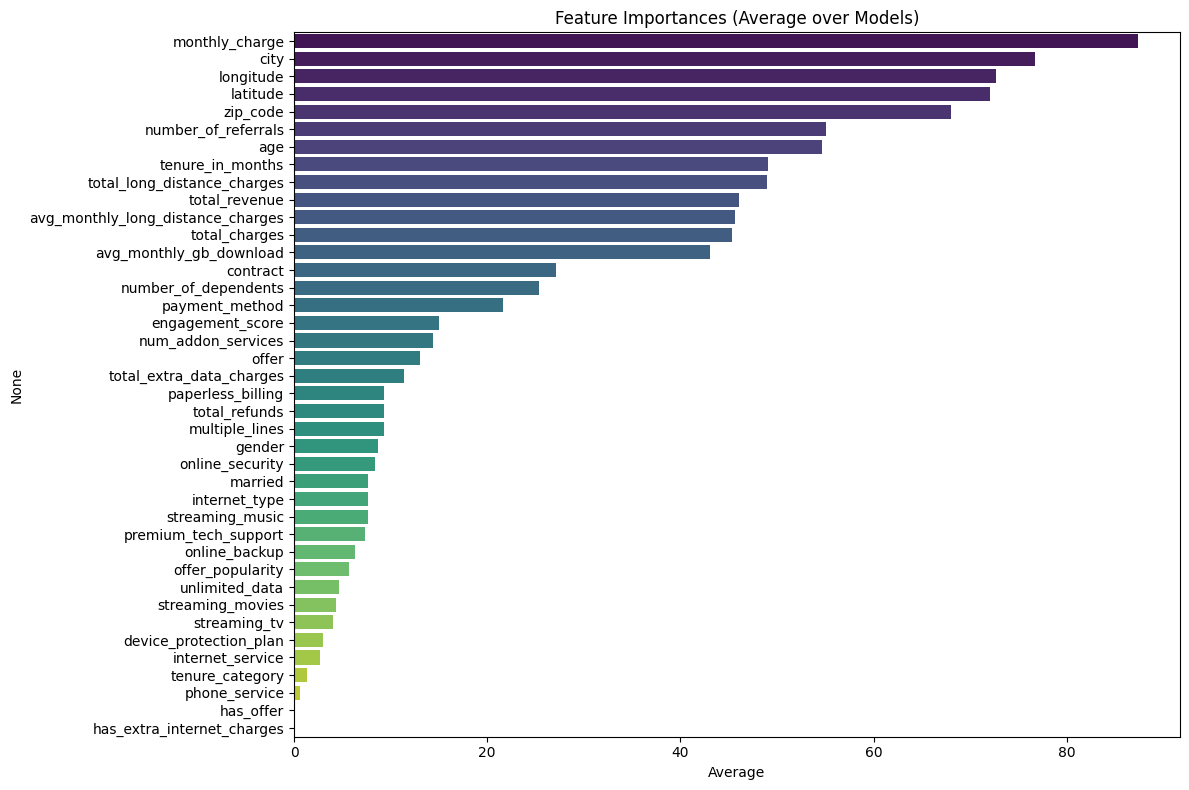

Selected 23 features:
['monthly_charge', 'city', 'longitude', 'latitude', 'zip_code', 'number_of_referrals', 'age', 'tenure_in_months', 'total_long_distance_charges', 'total_revenue', 'avg_monthly_long_distance_charges', 'total_charges', 'avg_monthly_gb_download', 'contract', 'number_of_dependents', 'payment_method', 'engagement_score', 'num_addon_services', 'offer', 'total_extra_data_charges', 'paperless_billing', 'total_refunds', 'multiple_lines']


In [38]:
top_features, fi_df = select_features(
    X_train, y_train, num_cols, cat_cols,
    # either leave top_k=None to use quantile
    # or explicitly pick how many features you want:
    top_k=23
)

print(f"Selected {len(top_features)} features:\n{top_features}")

In [39]:
# Filter datasets
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

In [40]:
sampleN = df[top_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
sampleC = df[top_features].select_dtypes(include=['object', 'category']).columns.tolist()

In [41]:
sampleN

['monthly_charge',
 'longitude',
 'latitude',
 'zip_code',
 'number_of_referrals',
 'age',
 'tenure_in_months',
 'total_long_distance_charges',
 'total_revenue',
 'avg_monthly_long_distance_charges',
 'total_charges',
 'avg_monthly_gb_download',
 'number_of_dependents',
 'engagement_score',
 'num_addon_services',
 'total_extra_data_charges',
 'total_refunds']

In [42]:
sampleC

['city',
 'contract',
 'payment_method',
 'offer',
 'paperless_billing',
 'multiple_lines']

In [43]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: customer_status, Length: 7043, dtype: int64

In [44]:
tempdf = df[top_features]

tempdf['customer_status'] = y

tempdf.sample(6)

,monthly_charge,city,longitude,latitude,zip_code,number_of_referrals,age,tenure_in_months,total_long_distance_charges,total_revenue,avg_monthly_long_distance_charges,total_charges,avg_monthly_gb_download,contract,number_of_dependents,payment_method,engagement_score,num_addon_services,offer,total_extra_data_charges,paperless_billing,total_refunds,multiple_lines,customer_status
1575,70.45,Patterson,-121.320337,37.410236,95363,9,25,62,2265.48,6565.93,36,4300.45,41.0,Month-to-Month,3,Credit Card,5,0,No Offer,0,Yes,0.0,Yes,0
4625,45.40,Torrance,-118.347957,33.807882,90505,0,31,2,21.62,102.57,10,80.95,13.0,Month-to-Month,0,Bank Withdrawal,1,0,No Offer,0,Yes,0.0,No,0
5899,20.20,San Diego,-117.012975,32.578103,92154,0,55,1,13.27,33.47,13,20.20,0.0,Month-to-Month,0,Mailed Check,0,0,No Offer,0,Yes,0.0,No,1
2731,25.90,Hermosa Beach,-118.396336,33.865320,90254,4,48,45,1012.05,2228.65,22,1216.60,0.0,One Year,0,Credit Card,1,0,Offer B,0,Yes,0.0,Yes,0
6582,72.35,Lockeford,-121.142070,38.166791,95237,0,63,67,361.13,5352.63,5,4991.50,9.0,One Year,0,Bank Withdrawal,6,3,No Offer,0,Yes,0.0,No,0
512,86.80,Inglewood,-118.330905,33.958134,90305,0,31,64,1775.36,7102.61,27,5327.25,12.0,Month-to-Month,2,Bank Withdrawal,4,2,Offer B,0,Yes,0.0,Yes,0


In [45]:
tempdf.to_csv('data/best_features_customer_churn_data.csv', index=False)

In [46]:
def optimize_model(
    X_train,
    y_train,
    X_test,
    y_test,
    cat_cols,
    n_trials: int = 50,
):
    """Run Optuna hyper‑parameter search with robust handling of categorical columns.

    Parameters
    ----------
    X_train, X_test : pd.DataFrame or array‑like
    y_train, y_test : pd.Series or array‑like
    cat_cols        : list[str]
        Names of categorical columns in the ORIGINAL training data.
    n_trials        : int, default 50
        Number of Optuna trials.

    Returns
    -------
    study          : optuna.study.Study
    best_model     : fitted estimator
    final_metrics  : dict[str, float]
    all_results    : list[dict]
    """

    # ✨ 1. Coerce inputs to pandas
    X_train = pd.DataFrame(X_train).reset_index(drop=True)
    X_test = pd.DataFrame(X_test).reset_index(drop=True)
    y_train = pd.Series(y_train).reset_index(drop=True)
    y_test = pd.Series(y_test).reset_index(drop=True)

    # ✨ 2. Ensure categorical columns are strings (avoids mixed dtypes)
    for col in cat_cols:
        if col in X_train.columns:
            X_train[col] = X_train[col].astype(str)
            X_test[col] = X_test[col].astype(str)

    # Meta‑vars
    study_results = []
    best_params: dict | None = None
    best_score: float = -np.inf
    n_classes: int = len(np.unique(y_train))
    average_method: str = "binary" if n_classes == 2 else "weighted"

    # ------------------------------------------------------------------
    # Optuna objective --------------------------------------------------
    # ------------------------------------------------------------------
    def objective(trial: optuna.trial.Trial) -> float:
        nonlocal best_params, best_score

        # 🔧 Choose preprocessing + learner ---------------------------
        encoder_type = trial.suggest_categorical(
            "encoder", ["onehot", "label", "CatBoost", "TargetEncoder"]
        )
        scaler_type = trial.suggest_categorical("scaler", ["standard", "minmax", "none"])
        model_name = trial.suggest_categorical(
            "model", ["XGBoost", "LightGBM", "CatBoost", "RandomForest"]
        )

        # 🔧 Model‑specific hyper‑parameters ---------------------------
        if model_name == "XGBoost":
            params = {
                "n_estimators": trial.suggest_int("xgb_n_estimators", 100, 500),
                "learning_rate": trial.suggest_float(
                    "xgb_learning_rate", 0.01, 0.3, log=True
                ),
                "max_depth": trial.suggest_int("xgb_max_depth", 3, 10),
                "subsample": trial.suggest_float("xgb_subsample", 0.6, 1.0),
                "colsample_bytree": trial.suggest_float(
                    "xgb_colsample_bytree", 0.6, 1.0
                ),
            }
        elif model_name == "LightGBM":
            params = {
                "n_estimators": trial.suggest_int("lgb_n_estimators", 100, 500),
                "learning_rate": trial.suggest_float(
                    "lgb_learning_rate", 0.01, 0.3, log=True
                ),
                "num_leaves": trial.suggest_int("lgb_num_leaves", 31, 511),
                "max_depth": trial.suggest_int("lgb_max_depth", -1, 10),
                "min_child_samples": trial.suggest_int(
                    "lgb_min_child_samples", 5, 100
                ),
            }
        elif model_name == "CatBoost":
            params = {
                "iterations": trial.suggest_int("cb_iterations", 100, 500),
                "learning_rate": trial.suggest_float(
                    "cb_learning_rate", 0.01, 0.3, log=True
                ),
                "depth": trial.suggest_int("cb_depth", 4, 10),
                "l2_leaf_reg": trial.suggest_float(
                    "cb_l2_leaf_reg", 1e-3, 10.0, log=True
                ),
            }
        else:  # RandomForest
            params = {
                "n_estimators": trial.suggest_int("rf_n_estimators", 100, 500),
                "max_depth": trial.suggest_int("rf_max_depth", 3, 30),
                "min_samples_split": trial.suggest_int("rf_min_samples_split", 2, 20),
                "min_samples_leaf": trial.suggest_int("rf_min_samples_leaf", 1, 20),
            }

        # 🔀 Cross‑validation -----------------------------------------
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        fold_scores: list[float] = []

        for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
            X_fold_train, X_fold_val = (
                X_train.iloc[train_idx].copy(),
                X_train.iloc[val_idx].copy(),
            )
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # 🪄 Encoding -------------------------------------------
            for col in cat_cols:
                if col not in X_fold_train.columns:
                    continue

                if encoder_type == "onehot":
                    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
                    ohe.fit(X_fold_train[[col]])

                    train_encoded = ohe.transform(X_fold_train[[col]])
                    val_encoded = ohe.transform(X_fold_val[[col]])

                    feature_names = ohe.get_feature_names_out([col])
                    X_fold_train = pd.concat(
                        [
                            X_fold_train.drop(columns=[col]),
                            pd.DataFrame(
                                train_encoded,
                                columns=feature_names,
                                index=X_fold_train.index,
                            ),
                        ],
                        axis=1,
                    )
                    X_fold_val = pd.concat(
                        [
                            X_fold_val.drop(columns=[col]),
                            pd.DataFrame(
                                val_encoded,
                                columns=feature_names,
                                index=X_fold_val.index,
                            ),
                        ],
                        axis=1,
                    )

                elif encoder_type in {"CatBoost", "TargetEncoder"}:
                    encoder_cls = CatBoostEncoder if encoder_type == "CatBoost" else TargetEncoder
                    encoder = encoder_cls()
                    # ⚠️ Ensure float dtype
                    X_fold_train[col] = (
                        encoder.fit_transform(X_fold_train[col], y_fold_train).astype(float)
                    )
                    X_fold_val[col] = encoder.transform(X_fold_val[col]).astype(float)

                else:  # label
                    le = LabelEncoder()
                    X_fold_train[col] = le.fit_transform(X_fold_train[col])
                    unseen = ~X_fold_val[col].isin(le.classes_)
                    X_fold_val.loc[unseen, col] = -1
                    seen = X_fold_val[col].isin(le.classes_)
                    X_fold_val.loc[seen, col] = le.transform(X_fold_val.loc[seen, col])

            # 🏗️ Scaling --------------------------------------------
            if scaler_type != "none":
                scaler = StandardScaler() if scaler_type == "standard" else MinMaxScaler()
                num_cols = X_fold_train.select_dtypes(include="number").columns
                if len(num_cols):
                    X_fold_train[num_cols] = scaler.fit_transform(X_fold_train[num_cols])
                    X_fold_val[num_cols] = scaler.transform(X_fold_val[num_cols])

            # 🧠 Model ----------------------------------------------
            if model_name == "XGBoost":
                model = XGBClassifier(
                    **params,
                    random_state=42,
                    enable_categorical=False,
                    eval_metric="auc" if n_classes == 2 else "mlogloss",
                    objective="binary:logistic" if n_classes == 2 else "multi:softprob",
                )
            elif model_name == "LightGBM":
                model = lgb.LGBMClassifier(
                    **params,
                    random_state=42,
                    objective="binary" if n_classes == 2 else "multiclass",
                    metric="auc" if n_classes == 2 else "multi_logloss",
                )
            elif model_name == "CatBoost":
                model = CatBoostClassifier(
                    **params,
                    random_state=42,
                    verbose=0,
                    loss_function="Logloss" if n_classes == 2 else "MultiClass",
                )
            else:
                model = RandomForestClassifier(
                    **params, random_state=42, class_weight="balanced"
                )

            # 🚀 Fit & predict --------------------------------------
            try:
                model.fit(X_fold_train, y_fold_train)
                if hasattr(model, "predict_proba"):
                    y_proba = model.predict_proba(X_fold_val)
                    score = (
                        roc_auc_score(y_fold_val, y_proba[:, 1])
                        if n_classes == 2
                        else roc_auc_score(y_fold_val, y_proba, multi_class="ovr")
                    )
                else:
                    y_pred = model.predict(X_fold_val)
                    score = roc_auc_score(y_fold_val, y_pred)
            except Exception as e:
                # ❌ Any failure → prune trial
                trial.set_user_attr("failed_fold", fold)
                trial.set_user_attr("fail_msg", str(e))
                raise TrialPruned()

            fold_scores.append(score)

        avg_auc = float(np.mean(fold_scores))

        # 🔥 Track best
        study_results.append(
            {
                "trial": trial.number,
                "model": model_name,
                "encoder": encoder_type,
                "scaler": scaler_type,
                "auc": avg_auc,
                "params": trial.params,
            }
        )
        if avg_auc > best_score:
            best_score = avg_auc
            best_params = trial.params.copy()

        return avg_auc

    # 🏁 Run Optuna -------------------------------------------------------
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    # ------------------------------------------------------------------
    # 🏆 Train final model on full training set using best params -------
    # ------------------------------------------------------------------
    encoder_type = study.best_params["encoder"]
    scaler_type = study.best_params["scaler"]
    model_name = study.best_params["model"]

    # ---- Encode full training data -----------------------------------
    X_train_processed = X_train.copy()
    final_encoders: dict[str, object] = {}

    for col in cat_cols:
        if col not in X_train_processed.columns:
            continue

        if encoder_type == "onehot":
            ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
            ohe.fit(X_train_processed[[col]])
            encoded = ohe.transform(X_train_processed[[col]])
            feature_names = ohe.get_feature_names_out([col])
            X_train_processed = pd.concat(
                [
                    X_train_processed.drop(columns=[col]),
                    pd.DataFrame(encoded, columns=feature_names, index=X_train_processed.index),
                ],
                axis=1,
            )
            final_encoders[col] = ohe

        elif encoder_type in {"CatBoost", "TargetEncoder"}:
            encoder_cls = CatBoostEncoder if encoder_type == "CatBoost" else TargetEncoder
            encoder = encoder_cls()
            X_train_processed[col] = (
                encoder.fit_transform(X_train_processed[col], y_train).astype(float)
            )
            final_encoders[col] = encoder

        else:  # label
            encoder = LabelEncoder()
            X_train_processed[col] = encoder.fit_transform(X_train_processed[col])
            final_encoders[col] = encoder

    # ---- Scale full training data ------------------------------------
    final_scaler = None
    if scaler_type != "none":
        scaler = StandardScaler() if scaler_type == "standard" else MinMaxScaler()
        num_cols = X_train_processed.select_dtypes(include="number").columns
        if len(num_cols):
            X_train_processed[num_cols] = scaler.fit_transform(X_train_processed[num_cols])
            final_scaler = scaler

    # ---- Instantiate final model -------------------------------------
    if model_name == "XGBoost":
        final_model = XGBClassifier(
            n_estimators=study.best_params["xgb_n_estimators"],
            learning_rate=study.best_params["xgb_learning_rate"],
            max_depth=study.best_params["xgb_max_depth"],
            subsample=study.best_params["xgb_subsample"],
            colsample_bytree=study.best_params["xgb_colsample_bytree"],
            random_state=42,
            enable_categorical=False,
            eval_metric="auc" if n_classes == 2 else "mlogloss",
            objective="binary:logistic" if n_classes == 2 else "multi:softprob",
        )
    elif model_name == "LightGBM":
        final_model = lgb.LGBMClassifier(
            n_estimators=study.best_params["lgb_n_estimators"],
            learning_rate=study.best_params["lgb_learning_rate"],
            num_leaves=study.best_params["lgb_num_leaves"],
            max_depth=study.best_params["lgb_max_depth"],
            min_child_samples=study.best_params["lgb_min_child_samples"],
            random_state=42,
            objective="binary" if n_classes == 2 else "multiclass",
            metric="auc" if n_classes == 2 else "multi_logloss",
        )
    elif model_name == "CatBoost":
        final_model = CatBoostClassifier(
            iterations=study.best_params["cb_iterations"],
            learning_rate=study.best_params["cb_learning_rate"],
            depth=study.best_params["cb_depth"],
            l2_leaf_reg=study.best_params["cb_l2_leaf_reg"],
            random_state=42,
            verbose=0,
            loss_function="Logloss" if n_classes == 2 else "MultiClass",
        )
    else:  # RandomForest
        final_model = RandomForestClassifier(
            n_estimators=study.best_params["rf_n_estimators"],
            max_depth=study.best_params["rf_max_depth"],
            min_samples_split=study.best_params["rf_min_samples_split"],
            min_samples_leaf=study.best_params["rf_min_samples_leaf"],
            class_weight="balanced",
            random_state=42,
        )

    final_model.fit(X_train_processed, y_train)

    # ------------------------------------------------------------------
    # 🧪 Evaluate on test set ------------------------------------------
    # ------------------------------------------------------------------
    X_test_processed = X_test.copy()

    for col in cat_cols:
        if col not in X_test_processed.columns:
            continue

        if encoder_type == "onehot":
            ohe = final_encoders[col]
            encoded = ohe.transform(X_test_processed[[col]])
            feature_names = ohe.get_feature_names_out([col])
            X_test_processed = pd.concat(
                [
                    X_test_processed.drop(columns=[col]),
                    pd.DataFrame(encoded, columns=feature_names, index=X_test_processed.index),
                ],
                axis=1,
            )
        elif encoder_type in {"CatBoost", "TargetEncoder"}:
            encoder = final_encoders[col]
            X_test_processed[col] = encoder.transform(X_test_processed[col]).astype(float)
        else:
            encoder = final_encoders[col]
            unseen = ~X_test_processed[col].isin(encoder.classes_)
            X_test_processed.loc[unseen, col] = -1
            seen = X_test_processed[col].isin(encoder.classes_)
            X_test_processed.loc[seen, col] = encoder.transform(
                X_test_processed.loc[seen, col]
            )

    if scaler_type != "none" and final_scaler is not None:
        num_cols = X_test_processed.select_dtypes(include="number").columns
        if len(num_cols):
            X_test_processed[num_cols] = final_scaler.transform(X_test_processed[num_cols])

    # ---- Metrics ------------------------------------------------------
    if hasattr(final_model, "predict_proba"):
        y_pred = final_model.predict(X_test_processed)
        y_proba = final_model.predict_proba(X_test_processed)
    else:
        y_pred = final_model.predict(X_test_processed)
        y_proba = None

    final_metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average=average_method, zero_division=0),
        "recall": recall_score(y_test, y_pred, average=average_method, zero_division=0),
        "f1": f1_score(y_test, y_pred, average=average_method, zero_division=0),
    }

    if y_proba is not None:
        if n_classes == 2:
            final_metrics["auc"] = roc_auc_score(y_test, y_proba[:, 1])
        else:
            final_metrics["auc"] = roc_auc_score(y_test, y_proba, multi_class="ovr")
    else:
        # Some models may not support proba
        try:
            final_metrics["auc"] = roc_auc_score(y_test, y_pred)
        except ValueError:
            final_metrics["auc"] = np.nan

    return study, final_model, final_metrics, study_results

In [47]:
study, best_model, final_metrics, all_results = optimize_model(
    X_train_sel, y_train, X_test_sel, y_test, 
    [col for col in cat_cols if col in top_features],
    n_trials=40
)

[I 2025-07-23 12:21:17,239] A new study created in memory with name: no-name-b70d8e1a-2bea-4198-aad8-3cc30478489d
[I 2025-07-23 12:21:18,032] Trial 0 finished with value: 0.9091205714810845 and parameters: {'encoder': 'CatBoost', 'scaler': 'standard', 'model': 'XGBoost', 'xgb_n_estimators': 333, 'xgb_learning_rate': 0.011315399830079292, 'xgb_max_depth': 5, 'xgb_subsample': 0.8069736746794012, 'xgb_colsample_bytree': 0.7655294438133708}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:19,225] Trial 1 finished with value: 0.8181338496460144 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'none', 'model': 'XGBoost', 'xgb_n_estimators': 347, 'xgb_learning_rate': 0.03334009416764395, 'xgb_max_depth': 10, 'xgb_subsample': 0.687363666847435, 'xgb_colsample_bytree': 0.9310901599551704}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:27,516] Trial 2 finished with value: 0.8966181542607478 and parameters: {'encoder': 'CatBoost', 'scaler': 'minmax'

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2244
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-07-23 12:21:32,440] Trial 4 finished with value: 0.8161300540492924 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'minmax', 'model': 'LightGBM', 'lgb_n_estimators': 349, 'lgb_learning_rate': 0.023996915529247535, 'lgb_num_leaves': 58, 'lgb_max_depth': 9, 'lgb_min_child_samples': 34}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:33,005] Trial 5 finished with value: 0.8973680745849405 and parameters: {'encoder': 'CatBoost', 'scaler': 'none', 'model': 'XGBoost', 'xgb_n_estimators': 291, 'xgb_learning_rate': 0.2851887624765119, 'xgb_max_depth': 4, 'xgb_subsample': 0.7880624935155629, 'xgb_colsample_bytree': 0.7705483149824921}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:33,457] Trial 6 finished with value: 0.9068007544527426 and parameters: {'encoder': 'label', 'scaler': 'standard', 'model': 'XGBoost', 'xgb_n_estimators': 174, 'xgb_learning_rate': 0.01382826986766812, 'xgb_max_depth': 7, 'xgb_subsample': 0.732168925574713, 'x

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3680
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-23 12:21:33,994] Trial 7 finished with value: 0.9072936089770275 and parameters: {'encoder': 'CatBoost', 'scaler': 'minmax', 'model': 'LightGBM', 'lgb_n_estimators': 362, 'lgb_learning_rate': 0.030301899346315973, 'lgb_num_leaves': 234, 'lgb_max_depth': 6, 'lgb_min_child_samples': 75}. Best is trial 0 with value: 0.9091205714810845.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:21:34,333] Trial 8 finished with value: 0.9011509392173211 and parameters: {'encoder': 'label', 'scaler': 'minmax', 'model': 'LightGBM', 'lgb_n_estimators': 330, 'lgb_learning_rate': 0.11481319088009989, 'lgb_num_leaves': 49, 'lgb_max_depth': 5, 'lgb_min_child_samples': 88}. Best is trial 0 with value: 0.9091205714810845.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:21:37,263] Trial 9 finished with value: 0.8763421871602608 and parameters: {'encoder': 'onehot', 'scaler': 'minmax', 'model': 'RandomForest', 'rf_n_estimators': 262, 'rf_max_depth': 9, 'rf_min_samples_split': 11, 'rf_min_samples_leaf': 13}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:38,984] Trial 10 finished with value: 0.9084055394274557 and parameters: {'encoder': 'CatBoost', 'scaler': 'standard', 'model': 'CatBoost', 'cb_iterations': 217, 'cb_learning_rate': 0.07664454673892701, 'cb_depth': 6, 'cb_l2_leaf_reg': 2.9542346835823503}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:40,316] Trial 11 finished with value: 0.907457074668183 and parameters: {'encoder': 'CatBoost', 'scaler': 'standard', 'model': 'CatBoost', 'cb_iterations': 206, 'cb_learning_rate': 0.07704197048321279, 'cb_depth': 6, 'cb_l2_leaf_reg': 4.37878096330047}. Best is trial 0 with value: 0.9091205714810845.
[I 2025-07-23 12:21:42,306] Trial 12 finished w

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-23 12:23:06,931] Trial 30 pruned. 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:23:08,448] Trial 31 finished with value: 0.9122652819923105 and parameters: {'encoder': 'label', 'scaler': 'none', 'model': 'CatBoost', 'cb_iterations': 379, 'cb_learning_rate': 0.027743842582768678, 'cb_depth': 4, 'cb_l2_leaf_reg': 0.2973450489802661}. Best is trial 18 with value: 0.91326054512662.
[I 2025-07-23 12:23:09,960] Trial 32 finished with value: 0.9121691431682323 and parameters: {'encoder': 'label', 'scaler': 'none', 'model': 'CatBoost', 'cb_iterations': 381, 'cb_learning_rate': 0.022945724829696437, 'cb_depth': 4, 'cb_l2_leaf_reg': 0.45330763531327944}. Best is trial 18 with value: 0.91326054512662.
[I 2025-07-23 12:23:11,858] Trial 33 finished with value: 0.912300830285806 and parameters: {'encoder': 'label', 'scaler': 'none', 'model': 'CatBoost', 'cb_iterations': 410, 'cb_learning_rate': 0.01740023010865343, 'cb_depth': 5, 'cb_l2_leaf_reg': 0.5396843933695696}. Best is trial 18 with value: 0.91326054512662.
[I 2025-07-23 12:23:14,520] Trial 34 finished w

[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2252
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265442 -> initscore=-1.017873
[LightGBM] [Info] Start training from score -1.017873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2025-07-23 12:23:26,678] Trial 38 finished with value: 0.7548112131156558 and parameters: {'encoder': 'TargetEncoder', 'scaler': 'none', 'model': 'LightGBM', 'lgb_n_estimators': 144, 'lgb_learning_rate': 0.010826633440723812, 'lgb_num_leaves': 500, 'lgb_max_depth': -1, 'lgb_min_child_samples': 55}. Best is trial 18 with value: 0.91326054512662.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-23 12:23:27,049] Trial 39 pruned. 


In [48]:
# Batch 4: Results Analysis
# Convert results to DataFrame
results_df = pd.DataFrame(all_results)
results_df.sample(6)

,trial,model,encoder,scaler,auc,params
22,22,CatBoost,label,none,0.912107,"{'encoder': 'label', 'scaler': 'none', 'model'..."
27,27,CatBoost,label,none,0.910659,"{'encoder': 'label', 'scaler': 'none', 'model'..."
30,31,CatBoost,label,none,0.912265,"{'encoder': 'label', 'scaler': 'none', 'model'..."
13,13,CatBoost,CatBoost,standard,0.903902,"{'encoder': 'CatBoost', 'scaler': 'standard', ..."
15,15,CatBoost,CatBoost,standard,0.907246,"{'encoder': 'CatBoost', 'scaler': 'standard', ..."
17,17,CatBoost,label,standard,0.911954,"{'encoder': 'label', 'scaler': 'standard', 'mo..."


In [49]:
# Show best parameters
print("\nBest Parameters:")
print(f"Model: {study.best_params['model']}")
print(f"Encoder: {study.best_params['encoder']}")
print(f"Scaler: {study.best_params['scaler']}")
print("Hyperparameters:")
for k, v in study.best_params.items():
    if k not in ['model', 'encoder', 'scaler']:
        print(f"{k}: {v}")


Best Parameters:
Model: CatBoost
Encoder: label
Scaler: none
Hyperparameters:
cb_iterations: 380
cb_learning_rate: 0.026497733166613822
cb_depth: 4
cb_l2_leaf_reg: 0.1637366877915777


In [50]:
# Show final metrics
print("\nTest Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")


Test Metrics:
accuracy: 0.8545
precision: 0.7568
recall: 0.6658
f1: 0.7084
auc: 0.9112


In [51]:
results_df.shape

(38, 6)

In [53]:
results_df.sort_values(by='auc', ascending = False).head(5)

,trial,model,encoder,scaler,auc,params
18,18,CatBoost,label,none,0.913261,"{'encoder': 'label', 'scaler': 'none', 'model'..."
19,19,CatBoost,label,none,0.913034,"{'encoder': 'label', 'scaler': 'none', 'model'..."
36,37,CatBoost,label,none,0.912767,"{'encoder': 'label', 'scaler': 'none', 'model'..."
32,33,CatBoost,label,none,0.912301,"{'encoder': 'label', 'scaler': 'none', 'model'..."
30,31,CatBoost,label,none,0.912265,"{'encoder': 'label', 'scaler': 'none', 'model'..."


In [54]:
results_df.sort_values(by='auc', ascending = False)

,trial,model,encoder,scaler,auc,params
18,18,CatBoost,label,none,0.913261,"{'encoder': 'label', 'scaler': 'none', 'model'..."
19,19,CatBoost,label,none,0.913034,"{'encoder': 'label', 'scaler': 'none', 'model'..."
36,37,CatBoost,label,none,0.912767,"{'encoder': 'label', 'scaler': 'none', 'model'..."
32,33,CatBoost,label,none,0.912301,"{'encoder': 'label', 'scaler': 'none', 'model'..."
30,31,CatBoost,label,none,0.912265,"{'encoder': 'label', 'scaler': 'none', 'model'..."
31,32,CatBoost,label,none,0.912169,"{'encoder': 'label', 'scaler': 'none', 'model'..."
22,22,CatBoost,label,none,0.912107,"{'encoder': 'label', 'scaler': 'none', 'model'..."
17,17,CatBoost,label,standard,0.911954,"{'encoder': 'label', 'scaler': 'standard', 'mo..."
21,21,CatBoost,label,none,0.911739,"{'encoder': 'label', 'scaler': 'none', 'model'..."
35,36,CatBoost,onehot,none,0.911715,"{'encoder': 'onehot', 'scaler': 'none', 'model..."


In [55]:
results_df['model'].value_counts()

model
CatBoost        23
XGBoost          6
RandomForest     5
LightGBM         4
Name: count, dtype: int64